In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('fivethirtyeight')
import seaborn as sns
color_palette = sns.color_palette()

import glob
from collections import Counter
import plotly.express as px

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rsury\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def f(i):
    return pd.read_csv(i, sep ='\t', header=None)

# **Train set - Processing**

In [3]:
train_path = glob.glob('./data/downloaded/*train-A.tsv')
train_df = pd.concat(map(f, train_path))
train_df = train_df.rename(columns={0:'id', 1:'sentiment', 2:'tweet'})
train_df.sentiment = train_df.sentiment.str.strip()
print(f'Size of train dataset : {train_df.shape}')
train_df.head()

Size of train dataset : (16041, 3)


,id,sentiment,tweet
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...


In [4]:
print(f' No. of duplicate values in train dataset : {train_df.duplicated().sum()}')

 No. of duplicate values in train dataset : 530


In [5]:
# train_df['sentiment'].replace('positive', 1,inplace=True)
# train_df['sentiment'].replace('negative', -1,inplace=True)
# train_df['sentiment'].replace('neutral', 0,inplace=True)
# train_df.head()

In [6]:
train_sentiment_cnt = train_df.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
train_sentiment_cnt.style.background_gradient(cmap='Oranges')

,sentiment,tweet
1,neutral,6840
2,positive,6827
0,negative,2374


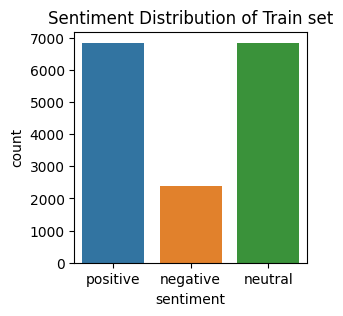

In [6]:
plt.figure(figsize=(3,3))
sns.countplot(x='sentiment',data=train_df).set_title('Sentiment Distribution of Train set')
plt.show()

In [7]:
train_df['temp_list'] = train_df['tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,12216
1,to,7407
2,on,4581
3,in,4544
4,a,4148
5,and,4090
6,I,3968
7,of,3748
8,for,3472
9,is,3091


In [8]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Train Dataset', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [9]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train_df['temp_list'] = train_df['temp_list'].apply(lambda x:remove_stopword(x))

In [10]:
top = Counter([item for sublist in train_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,may,1703
2,tomorrow,1488
3,going,1087
4,-,1076
5,The,989
6,see,850
7,1st,835
8,like,783
9,get,735
10,day,695


In [11]:
#MosT common positive words
Positive_sent = train_df[train_df['sentiment']=='positive']

top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,I,1875
1,tomorrow,695
2,may,653
3,see,499
4,going,440
5,-,410
6,day,396
7,The,369
8,1st,337
9,like,322


# **Dev set - Processing**

In [13]:
dev_path = glob.glob('./data/downloaded/*dev-A.tsv')
dev_df = pd.concat(map(f, dev_path))
dev_df = dev_df.rename(columns={0:'id', 1:'sentiment', 2:'tweet'})
dev_df.sentiment = dev_df.sentiment.str.strip()
print(f'Size of dev dataset : {dev_df.shape}')
dev_df.head()

Size of dev dataset : (3620, 3)


,id,sentiment,tweet
0,260097528899452929,neutral,Won the match #getin . Plus\u002c tomorrow is ...
1,263791921753882624,neutral,Some areas of New England could see the first ...
2,264194578381410304,negative,@francesco_con40 2nd worst QB. DEFINITELY Tony...
3,264041328420204544,neutral,#Thailand Washington - US President Barack Oba...
4,263816256640126976,neutral,Did y\u2019all hear what Tony Romo dressed up ...


In [14]:
# dev_df['sentiment'].replace('positive', 1,inplace=True)
# dev_df['sentiment'].replace('negative', -1,inplace=True)
# dev_df['sentiment'].replace('neutral', 0,inplace=True)
# dev_df.head()

In [14]:
print(f' No. of duplicate values in dev dataset : {dev_df.duplicated().sum()}')

 No. of duplicate values in dev dataset : 4


In [15]:
dev_sentiment_cnt = dev_df.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
dev_sentiment_cnt.style.background_gradient(cmap='Oranges')

,sentiment,tweet
1,neutral,1485
2,positive,1404
0,negative,731


# **Test set - Processing**

In [16]:
test_path = glob.glob('./data/downloaded/*test-A.tsv')
test_df = pd.concat(map(f, test_path))
test_df = test_df.drop(columns=[3], axis=1) # because of timestamp at the end of twitter-2016test-A.tsv file, it show 4th column that is not need for our analysis
test_df = test_df.rename(columns={0:'id', 1:'sentiment', 2:'tweet'})
test_df.sentiment = test_df.sentiment.str.strip()
print(f'Size of test dataset : {test_df.shape}')
test_df.head()

Size of test dataset : (30422, 3)


,id,sentiment,tweet
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."


In [18]:
# test_df['sentiment'].replace('positive', 1,inplace=True)
# test_df['sentiment'].replace('negative', -1,inplace=True)
# test_df['sentiment'].replace('neutral', 0,inplace=True)
# test_df.head()

In [17]:
print(f' No. of duplicate values in test dataset : {test_df.duplicated().sum()}')

 No. of duplicate values in test dataset : 66


In [18]:
test_sentiment_cnt = test_df.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
test_sentiment_cnt.style.background_gradient(cmap='Oranges')

,sentiment,tweet
1,neutral,14192
2,positive,11548
0,negative,4682


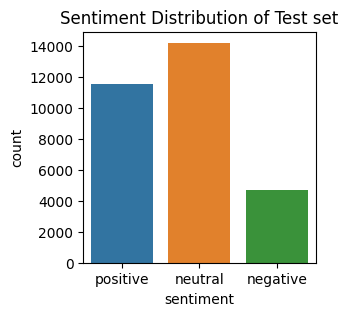

In [19]:
plt.figure(figsize=(3,3))
sns.countplot(x='sentiment',data=test_df).set_title('Sentiment Distribution of Test set')
plt.show()

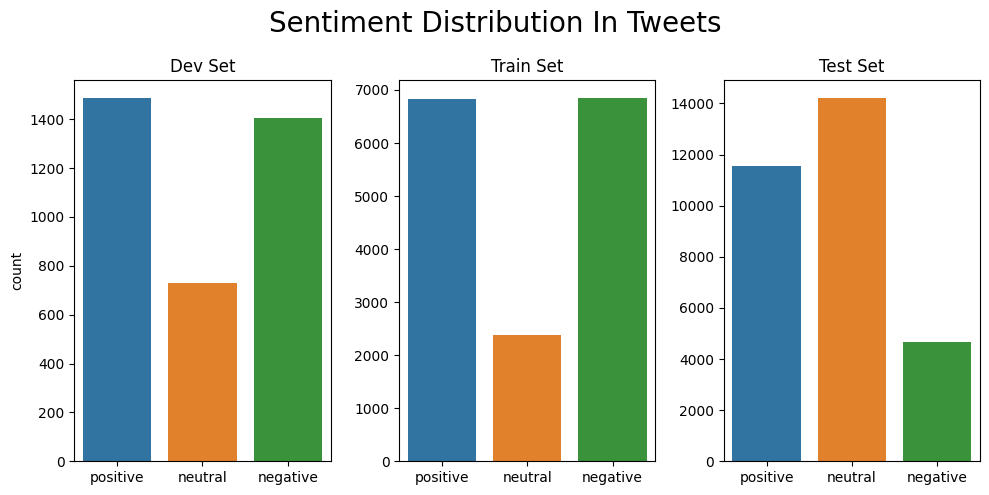

In [53]:
fig, ax = plt.subplots(1, 3, sharex='all', figsize=(10,5))
fig.suptitle('Sentiment Distribution In Tweets', fontsize=20)
sns.countplot(ax = ax[0], x='sentiment',data=dev_df)
ax[0].set(xlabel=None) 
ax[0].set_title('Dev Set')
sns.countplot(ax = ax[1], x='sentiment',data=train_df)
ax[1].set_title('Train Set')
ax[1].set(xlabel=None, ylabel=None) 
sns.countplot(ax = ax[2], x='sentiment',data=test_df)
ax[2].set_title('Test Set')
ax[2].set(xlabel=None, ylabel=None) 
plt.tight_layout()
plt.show()

# **Individual datasets**

In [23]:
train_13 = pd.read_csv('./data/downloaded/twitter-2013train-A.tsv', sep='\t', header=None)
train_14sarcasm = pd.read_csv('./data/downloaded/twitter-2014sarcasm-A.tsv', sep='\t', header=None)
train_15 = pd.read_csv('./data/downloaded/twitter-2015train-A.tsv', sep='\t', header=None)
train_16 = pd.read_csv('./data/downloaded/twitter-2016train-A.tsv', sep='\t', header=None)


In [24]:
def prop(df, dataset_name):
    print(f'Size of {dataset_name} dataset : {df.shape}')
    df = df.rename(columns={0:'id', 1:'sentiment', 2:'tweet'})
    df.sentiment = df.sentiment.str.strip()
    sentiment_cnt = df.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
    display(sentiment_cnt.style.background_gradient(cmap='Oranges'))
    return df    

In [25]:
train_13 = prop(train_13, 'train_13')
train_14sarcasm = prop(train_14sarcasm, 'train_14sarcasm')
train_15 = prop(train_15, 'train_15')
train_16 = prop(train_16, 'train_16')

Size of train_13 dataset : (9684, 3)


,sentiment,tweet
1,neutral,4586
2,positive,3640
0,negative,1458


Size of train_14sarcasm dataset : (49, 3)


,sentiment,tweet
0,negative,22
2,positive,20
1,neutral,7


Size of train_15 dataset : (489, 3)


,sentiment,tweet
1,neutral,253
2,positive,170
0,negative,66


Size of train_16 dataset : (5868, 3)


,sentiment,tweet
2,positive,3017
1,neutral,2001
0,negative,850


In [26]:
test_13 = pd.read_csv('./data/downloaded/twitter-2013test-A.tsv', sep='\t', header=None)
test_14 = pd.read_csv('./data/downloaded/twitter-2014test-A.tsv', sep='\t', header=None)
test_15 = pd.read_csv('./data/downloaded/twitter-2015test-A.tsv', sep='\t', header=None)
test_16 = pd.read_csv('./data/downloaded/twitter-2016test-A.tsv', sep='\t', header=None)

In [27]:
test_13 = prop(test_13, 'test_13')
test_14 = prop(test_14, 'test_14')
test_15 = prop(test_15, 'test_15')
test_16 = prop(test_16, 'test_16')

Size of test_13 dataset : (3547, 3)


,sentiment,tweet
1,neutral,1513
2,positive,1475
0,negative,559


Size of test_14 dataset : (1853, 3)


,sentiment,tweet
2,positive,982
1,neutral,669
0,negative,202


Size of test_15 dataset : (2390, 3)


,sentiment,tweet
2,positive,1038
1,neutral,987
0,negative,365


Size of test_16 dataset : (20632, 4)


,sentiment,tweet
1,neutral,10342
2,positive,7059
0,negative,3231


In [28]:
dev_13 = pd.read_csv('./data/downloaded/twitter-2013dev-A.tsv', sep='\t', header=None)
dev_16 = pd.read_csv('./data/downloaded/twitter-2016dev-A.tsv', sep='\t', header=None)
dev_16_test = pd.read_csv('./data/downloaded/twitter-2016devtest-A.tsv', sep='\t', header=None)

In [29]:
dev_13 = prop(dev_13, 'dev_13')
dev_16 = prop(dev_16, 'dev_16')
dev_16_test = prop(dev_16_test, 'dev_16_test')

Size of dev_13 dataset : (1654, 3)


,sentiment,tweet
1,neutral,739
2,positive,575
0,negative,340


Size of dev_16 dataset : (1966, 3)


,sentiment,tweet
2,positive,829
1,neutral,746
0,negative,391


Size of dev_16_test dataset : (2000, 3)


,sentiment,tweet
2,positive,994
1,neutral,681
0,negative,325
